In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
#!pip install arabic_reshaper
print('Ok!')

Ok!


In [13]:
data = pd.read_csv('tweet.csv')
data.head()

,Tweets,created_at
0,RT @izaatreh: حتى لو كل الشعب اخذ اللقاح يا ري...,2021-04-30 23:58:01
1,حتى لو كل الشعب اخذ اللقاح يا ريت ثقافة البوس ...,2021-04-30 23:54:29
2,@mohgovjo هل في خدمة تلقيح لكبار السن في المنز...,2021-04-30 22:07:53
3,@ineual يادي البلاوي الي ورا بعضيها .. شو نعمل...,2021-04-30 20:21:43
4,اللي اخد اللقاح هاي الفترة شو نوع اللي اخدتوه؟؟,2021-04-30 20:11:42


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3085 entries, 0 to 3084
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tweets      3084 non-null   object
 1   created_at  3084 non-null   object
dtypes: object(2)
memory usage: 48.3+ KB


In [15]:
data.Tweets

0       RT @izaatreh: حتى لو كل الشعب اخذ اللقاح يا ري...
1       حتى لو كل الشعب اخذ اللقاح يا ريت ثقافة البوس ...
2       @mohgovjo هل في خدمة تلقيح لكبار السن في المنز...
3       @ineual يادي البلاوي الي ورا بعضيها .. شو نعمل...
4         اللي اخد اللقاح هاي الفترة شو نوع اللي اخدتوه؟؟
                              ...                        
3080                                @radiclfeminist 😂😂😂😂😂
3081            Limit TV time and certain TV programming.
3082    لمن اقسم و ما زال يحفظ القسم، لمن رأى الحسين ن...
3083    Going on instagram reels because i feel attack...
3084    كلوب أمام "القرار المصيري" لموقعة ريال مدريد ....
Name: Tweets, Length: 3085, dtype: object

## Text tokinization

In [16]:
import nltk
from nltk import sent_tokenize,word_tokenize
from nltk.probability import FreqDist
nltk.download("stopwords")
from collections import Counter


[nltk_data] Downloading package stopwords to C:\Users\Computergy
[nltk_data]     World\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
# Define a list of arabic and english punctiations that we want to get rid of in our text
import string
import re 

punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ''' + string.punctuation
arb_stopwords = set(nltk.corpus.stopwords.words("arabic")).union({'ا','و','الله','او','من','الى','عن','على','في','ي','ال','ه','ف','ع','ب','ان'})

arabic_diacritics = re.compile("""
                             ّ    | # Shadda
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)

def preprocess(text):
    
    '''
    text is an arabic string input
    
    the preprocessed text is returned
    '''
    text = str(text)
    #remove punctuations
    translator = str.maketrans('', '', punctuations)
    text = text.translate(translator)
    
    # remove Tashkeel
    text = re.sub(arabic_diacritics, '', text)
    
    #remove longation
    text= re.sub("[إأآا]", "ا", text)
    text= re.sub("الردن",'الاردن' ,text)
    text= re.sub("ال",' ' ,text)
    #remove stop words and unkwon characters
    filtered = []
    for w in text.split():
        w = re.sub(r"[0-9a-zA-Z]", "", w,flags=re.I)
        if w not in arb_stopwords:
            filtered.append(w)
    text = ' '.join(word for word in filtered)

    return text
  
data['Tweets'] = data['Tweets'].apply(preprocess)
print(data.head(5))

                                              Tweets           created_at
0               شعب اخذ لقاح ريت ثقافة بوس ترجع ابدا  2021-04-30 23:58:01
1               شعب اخذ لقاح ريت ثقافة بوس ترجع ابدا  2021-04-30 23:54:29
2   خدمة تلقيح لكبار سن منزل اذا ماهي ية تسجيل وم...  2021-04-30 22:07:53
3   يادي بلاوي ورا بعضيها شو نعمل طيب ناخد لقاح ا...  2021-04-30 20:21:43
4                    اخد لقاح هاي فترة شو نوع اخدتوه  2021-04-30 20:11:42


In [18]:
Tweets = data['Tweets'].values.tolist()

In [19]:
tokenized = []
for i in Tweets :
    i = word_tokenize(i)
    for b in i :
        tokenized.append(b)

In [20]:
print('tokeniz=',len(tokenized ))
print('type=',len(set(tokenized) ))

tokeniz= 36643
type= 9162


In [21]:
from arabic_reshaper import reshape      
from bidi.algorithm import get_display   

rtl = lambda w: get_display(reshape(f'{w}'))

COUNTS = Counter(tokenized )
counts = ((rtl(k),v) for k, v in COUNTS.most_common(15))

In [22]:
COUNTS.most_common(20)

[('لقاح', 1209),
 ('مطعوم', 1163),
 ('كورونا', 821),
 ('اردن', 493),
 ('عاجل', 344),
 ('جرعة', 319),
 ('صحة', 223),
 ('مطاعيم', 214),
 ('انا', 166),
 ('استرازينيكا', 164),
 ('اخباري', 160),
 ('يوم', 158),
 ('تلقوا', 151),
 ('اولى', 148),
 ('مليون', 140),
 ('تلقي', 132),
 ('اي', 129),
 ('شخص', 128),
 ('مش', 127),
 ('انه', 127)]

In [23]:
word=[]
count=[]
for i in counts:
    word.append(i[0])
    count.append(i[1])


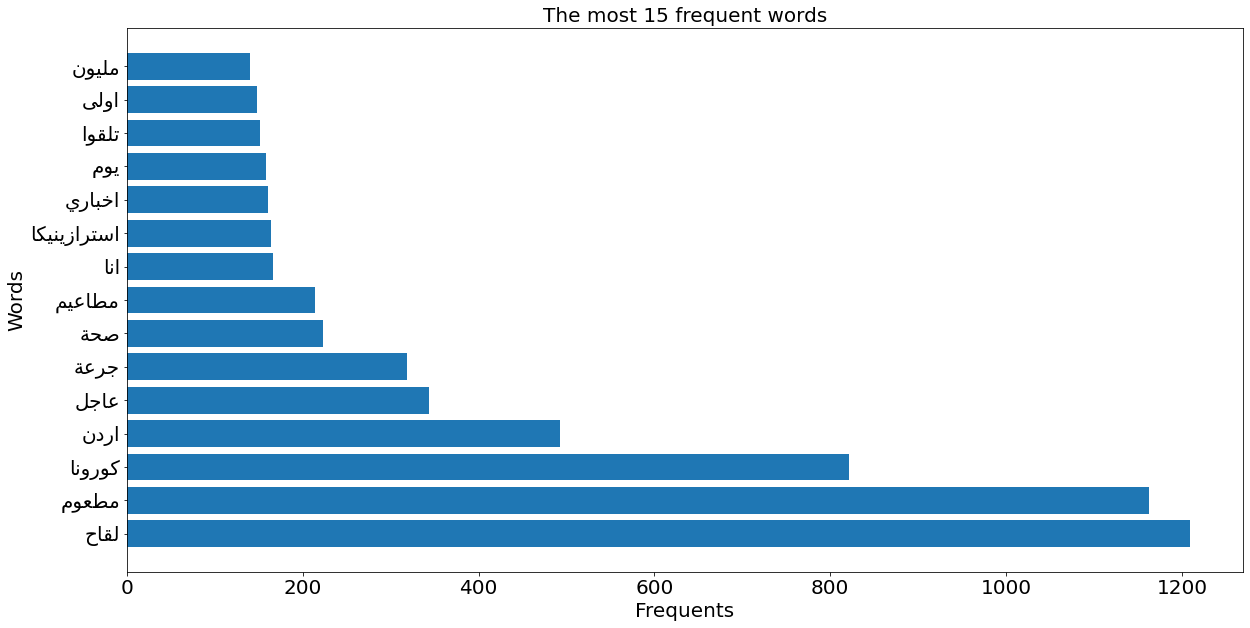

In [29]:
plt.barh(word, count)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.rcParams["figure.figsize"] = (20,10)
plt.ylabel('Words' , fontsize=20)
plt.xlabel('Frequents' , fontsize=20)
plt.title('The most 15 frequent words' , fontsize=20)
plt.savefig('Figures\most common words.png')
plt.show()

# wordcloud

In [30]:
#!pip install wordcloud
print('Ok!')

Ok!


In [31]:
import numpy as np
from wordcloud import ImageColorGenerator 
from PIL import Image
Jordan = np.array(Image.open('Images\jo.png'))

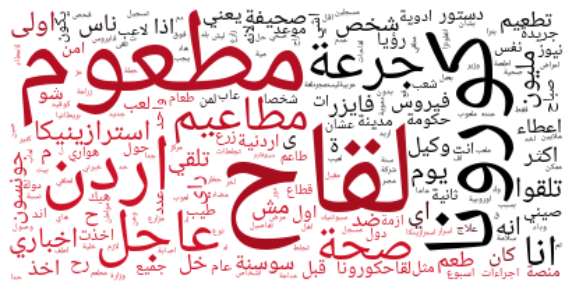

In [33]:
from wordcloud import WordCloud          
         
counts = {rtl(k):v for k, v in COUNTS.most_common(4000)}

font_file = r'Font\NotoNaskhArabicUI-Regular.ttf'

wordcloud = WordCloud(font_path=font_file, background_color="white").generate_from_frequencies(counts)

# Font color
image_colors = ImageColorGenerator(Jordan)
plt.imshow(wordcloud.recolor(color_func=image_colors) , interpolation="bilinear")
#plt.imshow(wordcloud)#, interpolation="bilinear")

plt.axis("off")
plt.savefig('Figures\WordCloud.png')
plt.rcParams["figure.figsize"] = (10,6)
plt.show()


_____________________________________________________________________________________

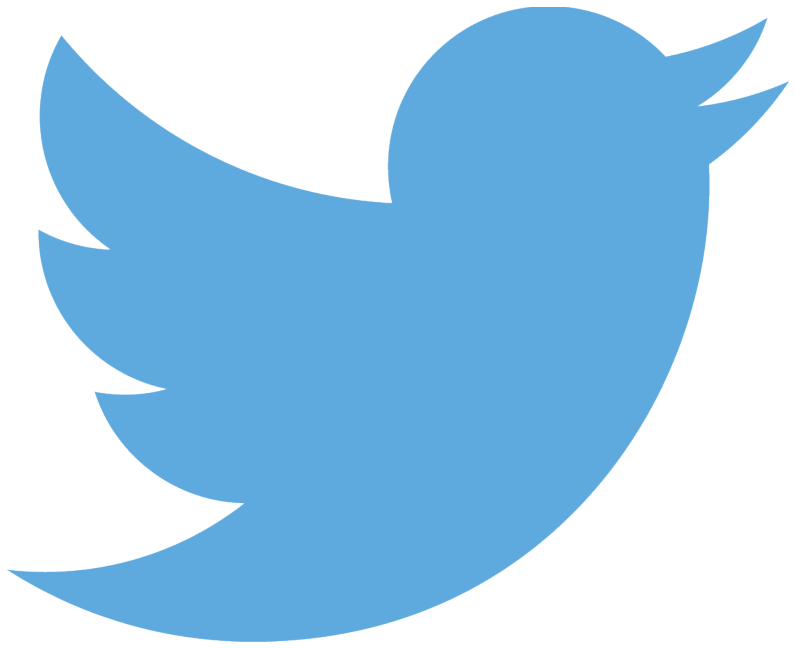

In [34]:
Twitter = np.array(Image.open('Images\Twitter_logo_blue.png'))
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height


plt.imshow(Twitter, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [35]:
# -- Arabic text dependencies
counts = {rtl(k):v for k, v in COUNTS.most_common(4000)}

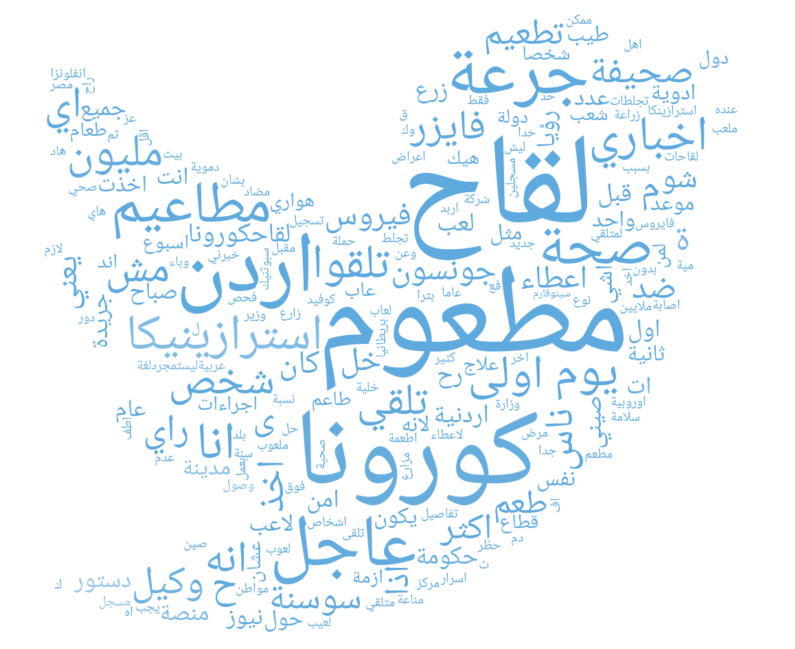

In [36]:
# instantiate a word cloud object
wordcloud = WordCloud(font_path=font_file, background_color="white", mask = Twitter )

# generate the word cloud
wordcloud.generate_from_frequencies(counts)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

image_colors = ImageColorGenerator(Twitter)
plt.imshow(wordcloud.recolor(color_func=image_colors) , interpolation="bilinear")
plt.axis("off")
plt.savefig('Figures\WordCloud2.png')
plt.show()